## 선형 회귀

### 정규 방정식을 사용한 선형 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

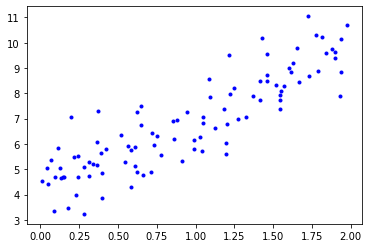

In [ ]:
plt.plot(X, y, 'b.')

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]

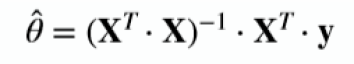

#### 정규방정식공식을 np.linalg 함수들을 이용하여 해를 구함

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b


array([[1., 0.],
       [1., 2.]])

In [ ]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

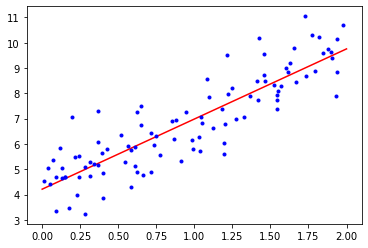

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, 'b.')
plt.show()

#### 사이킷런 제공 LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.score(__, __) # R2 값

### 경사 하강법을 사용한 선형 회귀

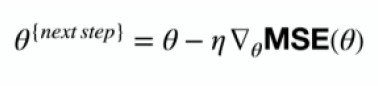

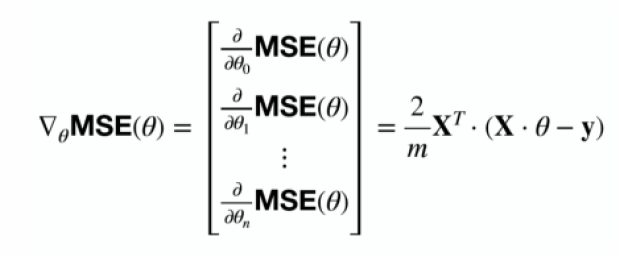

In [4]:
X_b = np.c_[np.ones((100, 1)), X]

(100, 2)

In [6]:
m = 100
theta = np.random.randn(2, 1)
eta = 0.1
n_iterations = 1000
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [8]:
theta

array([[4.21509616],
       [2.77011339]])

#### 확률적 경사 하강법

In [17]:
np.random.seed(42)

In [18]:
m = 100
theta = np.random.randn(2, 1)
eta = 0.1
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index +1] # 한개의 샘플
    yi = y[random_index: random_index +1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i) # step 수가 증가함에 따라 eta가 작아지게 함
    theta = theta - eta * gradients

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [27]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))